Подготова датасета

In [1]:
# Импортируем библиотеки

from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Этап 1
#(https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction)
# Загрузка данных
dataset = pd.read_csv('housing.csv')

# Проверка структуры данных
print("Названия столбцов:", dataset.columns.tolist())
print("Первые 5 строк датасета:")
print(dataset.head())

Названия столбцов: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Первые 5 строк датасета:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no        

In [5]:
# Этап 2: Анализ данных для понимания их структуры и ключевых характеристик

# Вывод общей информации о датасете, включая количество записей, столбцов, типы данных и количество ненулевых значений
print("\nОсновная информация о датасете:")
print(dataset.info())

# Вывод статистического описания числовых признаков, таких как среднее, минимальное, максимальное значения и квартиля
print("\nСтатистическое описание числовых признаков:")
print(dataset.describe())

# Проверка уникальных значений в категориальных признаках
# Это помогает понять, какие категории присутствуют и как они распределены
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
                       'prefarea', 'furnishingstatus']
for column in categorical_columns:
    # Вывод уникальных значений для каждого категориального признака
    print(f"\nУникальные значения в столбце {column}: {dataset[column].unique()}")



Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Статистическое описание числовых признаков:
              price          area    bedrooms   bathrooms     stories  

In [7]:
# Этап 3: Предобработка данных для подготовки к анализу и моделированию

# Преобразование бинарных категориальных данных в числовые
# Меняем значения 'yes' на 1 и 'no' на 0, чтобы сделать данные пригодными для анализа
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in binary_columns:
    dataset[column] = dataset[column].map({'yes': 1, 'no': 0})

# Преобразование мультиклассового признака 'furnishingstatus' с помощью One-Hot кодирования
# Создаются два новых столбца: 'furnishingstatus_semi-furnished' и 'furnishingstatus_unfurnished'
# Удаляем первый столбец для предотвращения проблемы мультиколлинеарности (drop_first=True)
dataset = pd.get_dummies(dataset, columns=['furnishingstatus'], drop_first=True)

# Преобразование типов данных новых столбцов из One-Hot кодирования в числовой формат (int)
dataset[['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']] = \
    dataset[['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']].astype(int)


# Вывод первых пяти строк преобразованного датасета для проверки результата
print("\nДанные после предобработки (первые 5 строк):")
print(dataset.head())




Данные после предобработки (первые 5 строк):
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0           

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Разделение данных на признаки (X) и целевую переменную (y)
X = dataset.drop(columns=['price'])  # Признаки
y = dataset['price']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение моделей
models = {
    "Linear Regression": LinearRegression(),  # Линейная регрессия
    "Polynomial Regression (degree=2)": PolynomialFeatures(degree=2),  # Полиномиальная регрессия
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Дерево решений
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),  # Случайный лес
    "Support Vector Regression (RBF)": SVR(kernel='rbf')  # Машина опорных векторов с RBF ядром
}

# Функция для расчета скорректированного коэффициента детерминации (Adjusted R²)
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Словарь для хранения результатов
results = {}

# Применение моделей
for name, model in models.items():
    if name == "Polynomial Regression (degree=2)":
        # Полиномиальная регрессия
        poly_features = PolynomialFeatures(degree=2).fit_transform(X_train)  # Преобразование признаков
        poly_model = LinearRegression().fit(poly_features, y_train)  # Линейная регрессия
        y_pred = poly_model.predict(PolynomialFeatures(degree=2).fit_transform(X_test))  # Прогноз
        
        # Метрики
        n, k = len(y_test), poly_features.shape[1]
    else:
        # Все остальные модели
        model.fit(X_train, y_train)  # Обучение
        y_pred = model.predict(X_test)  # Прогноз
        
        # Метрики
        n, k = len(y_test), X_train.shape[1]

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n, k)
    cv_r2 = np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=5)) if name != "Polynomial Regression (degree=2)" else None

    # Сохранение метрик
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "Adjusted R²": adj_r2,
        "Cross-Validated R²": cv_r2
    }

# Вывод результатов
print("\nРезультаты метрик для каждой модели:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"  {metric_name}: {value:.4f}")



Результаты метрик для каждой модели:

Linear Regression:
  MAE: 970043.4039
  MSE: 1754318687330.6641
  RMSE: 1324506.9601
  R²: 0.6529
  Adjusted R²: 0.6054
  Cross-Validated R²: 0.6470

Polynomial Regression (degree=2):
  MAE: 1042927.6354
  MSE: 1916484378006.6091
  RMSE: 1384371.4740
  R²: 0.6208
  Adjusted R²: -12.6497

Decision Tree:
  MAE: 1195266.0550
  MSE: 2642802637614.6787
  RMSE: 1625669.9043
  R²: 0.4771
  Adjusted R²: 0.4056
  Cross-Validated R²: 0.1364

Random Forest:
  MAE: 1022560.0528
  MSE: 1964193399645.3335
  RMSE: 1401496.8425
  R²: 0.6114
  Adjusted R²: 0.5582
  Cross-Validated R²: 0.5947

Support Vector Regression (RBF):
  MAE: 1763890.2922
  MSE: 5567932366409.7832
  RMSE: 2359646.6613
  R²: -0.1016
  Adjusted R²: -0.2523
  Cross-Validated R²: -0.0649


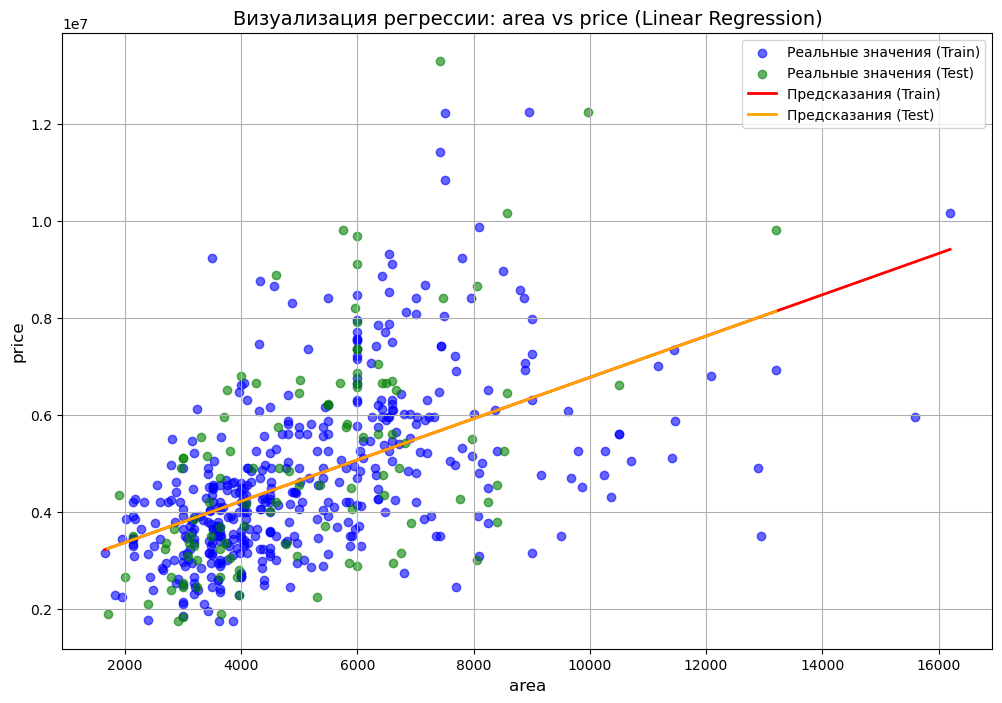

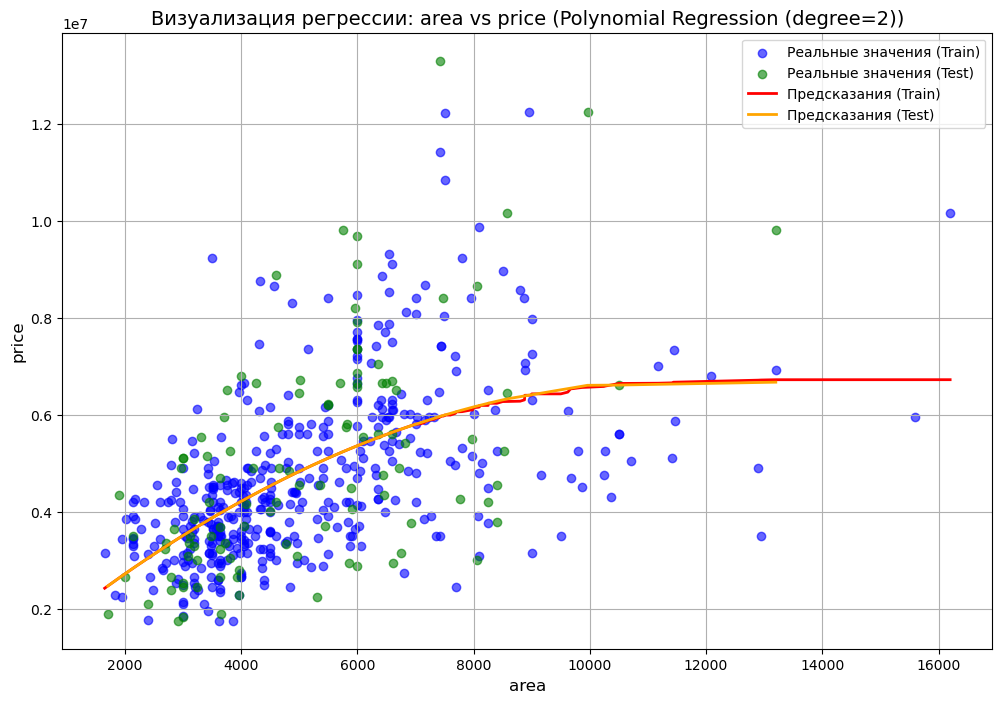

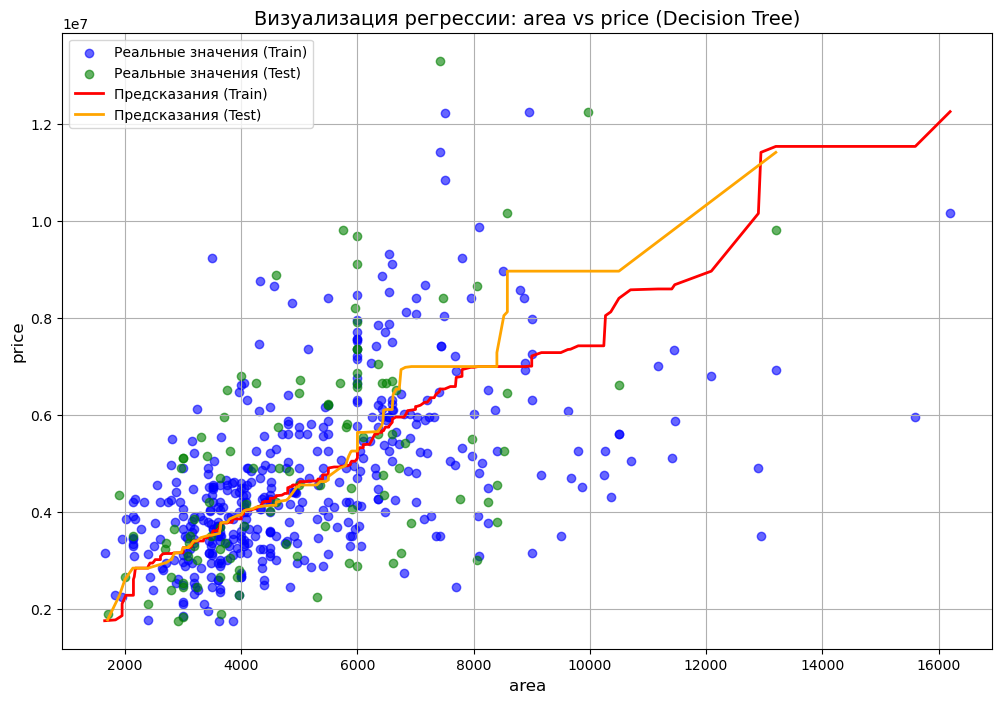

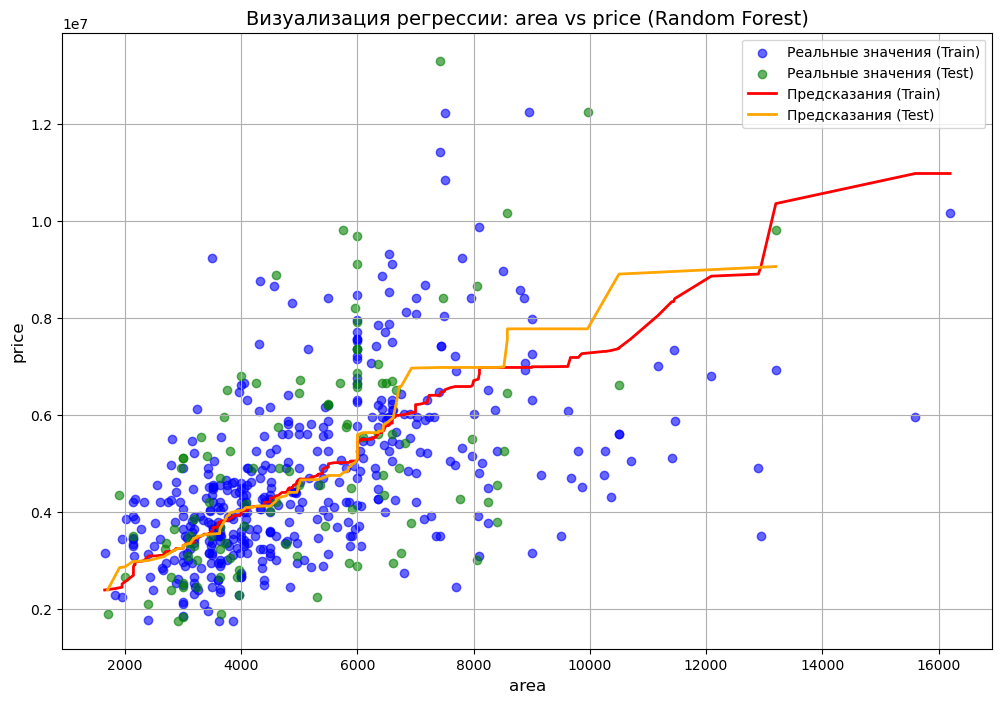

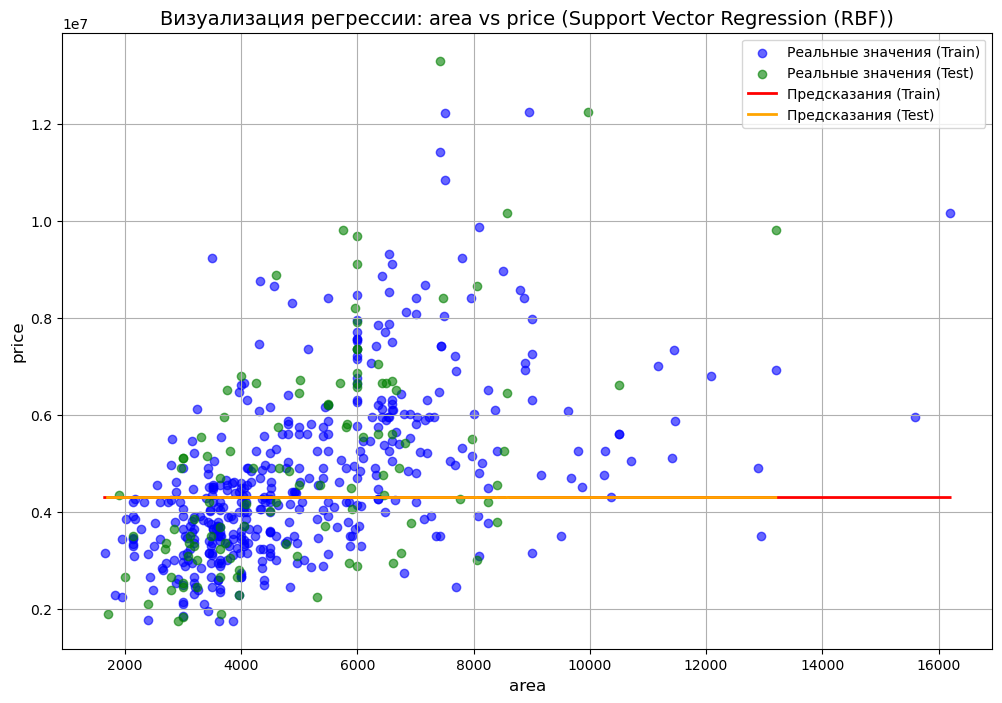

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Выбор признака для визуализации
feature = 'area'
X_feature_train = X_train[[feature]]  # Выбираем столбец 'area' из обучающей выборки
X_feature_test = X_test[[feature]]  # То же самое для тестовой выборки

# Функция для визуализации модели
def plot_regression(model, model_name, X_feature_train, y_train, X_feature_test, y_test):
    """
    Построение графика регрессии для заданной модели и признака.

    model: модель машинного обучения
    model_name: название модели
    X_feature_train: значения выбранного признака из обучающей выборки
    y_train: истинные значения целевой переменной из обучающей выборки
    X_feature_test: значения выбранного признака из тестовой выборки
    y_test: истинные значения целевой переменной из тестовой выборки
    """
    # Проверяем, является ли модель полиномиальной
    if model_name == "Polynomial Regression (degree=2)":
        # Преобразование признака в полиномиальные признаки
        poly_transformer = PolynomialFeatures(degree=2)
        X_poly_train = poly_transformer.fit_transform(X_feature_train)
        X_poly_test = poly_transformer.transform(X_feature_test)
        
        # Обучение модели на преобразованных данных
        model.fit(X_poly_train, y_train)
        
        # Прогнозирование целевой переменной
        y_pred_train = model.predict(X_poly_train)
        y_pred_test = model.predict(X_poly_test)
    else:
        # Для остальных моделей обучаем модель на данных X_feature_train
        model.fit(X_feature_train, y_train)
        
        # Прогнозирование целевой переменной
        y_pred_train = model.predict(X_feature_train)
        y_pred_test = model.predict(X_feature_test)

    # Построение графика зависимости
    plt.figure(figsize=(12, 8))  # Размер графика
    plt.scatter(X_feature_train, y_train, color='blue', label='Реальные значения (Train)', alpha=0.6)
    plt.scatter(X_feature_test, y_test, color='green', label='Реальные значения (Test)', alpha=0.6)
    plt.plot(np.sort(X_feature_train.values.ravel()), 
             np.sort(y_pred_train), color='red', label=f'Предсказания (Train)', linewidth=2)
    plt.plot(np.sort(X_feature_test.values.ravel()), 
             np.sort(y_pred_test), color='orange', label=f'Предсказания (Test)', linewidth=2)
    plt.title(f"Визуализация регрессии: {feature} vs price ({model_name})", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("price", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

# Инициализация моделей
models = {
    "Linear Regression": LinearRegression(),  # Линейная регрессия
    "Polynomial Regression (degree=2)": LinearRegression(),  # Полиномиальная регрессия (LinearRegression используется после трансформации)
    "Decision Tree": DecisionTreeRegressor(random_state=42),  # Дерево решений
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),  # Случайный лес
    "Support Vector Regression (RBF)": SVR(kernel='rbf')  # Машина опорных векторов с RBF ядром
}

# Построение графиков для всех моделей
for model_name, model in models.items():
    plot_regression(model, model_name, X_feature_train, y_train, X_feature_test, y_test)
